In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

**Задание**

Цель: применить на практике базовые ансамблевые методы

Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)
Этапы работы:

1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

2.Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html,
preprocessing.LabelEncoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.
Старайтесь не использовать для этой задачи циклы.
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4.Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
b) ensemble.RandomForestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

5.Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

6.Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

7.Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
a) Повторите п. 5

8.Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html. Используйте ensemble.StackingClassifier.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
a) Повторите п. 5

9.Сформулируйте выводы по проделанной работе.
a) Сравните метрики построенных моделей.
b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

Результат: получены знания по использованию базовых ансамблевых методов.

**Форма выполнения**:
* ссылка на Jupyter Notebook, загруженный на GitHub
* ссылка на Google Colab
* файл с расширением .ipynb

**Инструменты**:
* Jupyter Notebook/Google Colab;
* GitHub.
* данные с сайта https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
pd.get_dummies, preprocessing.LabelEncoder
модели tree.DecisionTreeClassifier https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html и ensemble.RandomForestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
metrics.classification_report https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
ensemble.BaggingClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
svm.LinearSVC https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
ensemble.StackingClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html


**Рекомендации к выполнению**:

* Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
* У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
* Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
* Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

# 1.Загрузка данных

In [ ]:
df = pd.read_csv('heart.csv', sep=',', encoding='cp1251')

**Описание датасета**

Статистические данные о группах домов в Калифорнии, основанные на переписи 1990 года.   


**age**: age of person - возраст пациента [годы]

**Sex**: Male or Female - пол пациента [M: мужчина, F: женщина]

**ChestPinType** : any pain in the area of your chest - тип боли в груди

**ASY** = Asymptomatic - бесимптомная

**NAP** = Non Anginal pain - неангинальная боль

**ATA** = Atypical Angina - атипичная стенокардия

**TA** = Typical Angina - типичная стенокардия

**Restin BP** : Resting Blood Pressure (Hypertension) - артериальное давление в состоянии покоя [мм рт. ст.]

**Cholesterol** : Cholesterol level in the blood - уровень холестерина в крови

**fasting BS** : A fasting blood sugar (FBS) level is the result of a blood sample taken after a patient fasts for at least eight hours, 1 = if FastingBS > 120 mg/dl, 0 = otherwise - Уровень сахара в крови натощак [1: если уровень сахара в крови натощак> 120 мг / дл, 0: в противном случае]


**Resting ECG**:is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks - это неинвазивный тест, который может выявить аномалии, включая аритмии, признаки ишемической болезни сердца, гипертрофию левого желудочка и блокаду ножек пучка Гиса.


**MaxHR** : Maximum Heart Rate - достигнутая максимальная частота сердечных сокращений [числовое значение от 60 до 202]

**ExerciseAngina** : If person do angina exercise or not, Y = Yes, N = No - Стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]

**Oldpeak**: ST depression induced by exercise relative to rest - ST числовое значение, измеренное в депрессии

**ST_Slope** : The ST segment shift relative to exercise-induced increments in heart rate - Сдвиг сегмента ST относительно прироста частоты сердечных сокращений, вызванного физической нагрузкой.

**HeartDisease** : output class - выходной класс 1: болезнь сердца, 0: норма


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA

In [ ]:
print(f'Всего {df.shape[0]} записей и {df.shape[1]} полей ')

Всего 918 записей и 12 полей 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
  # Преобразуем категориальные переменные к типу данных "category"
  cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

  for col in cat_cols:
      df[col] = df[col].astype("category")
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Данные не содержат null значения

In [ ]:
print(f'В данных встречаются дубликаты {df.duplicated().sum()} раз.')

В данных встречаются дубликаты 0 раз.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
df.describe(include='category').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


### Посмотрим на распределение признаков и таргета

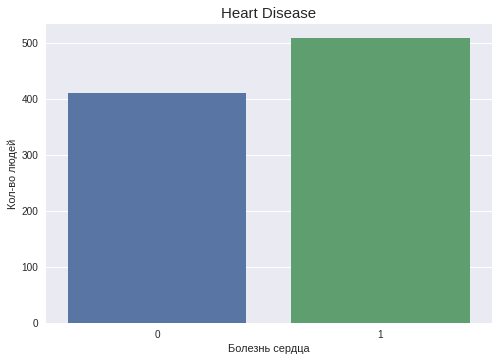

In [ ]:
sns.countplot(df["HeartDisease"])
plt.title("Heart Disease",size = 15)
plt.xlabel('Болезнь сердца')
plt.ylabel('Кол-во людей')
plt.show()


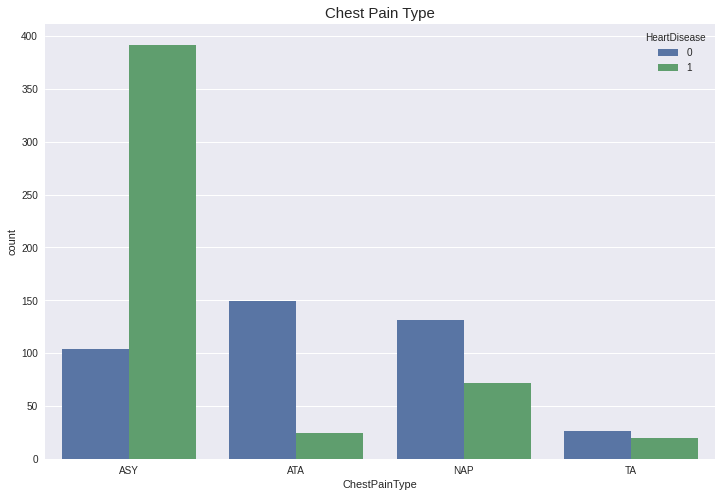

In [ ]:
plt.figure(figsize= (12,8))
sns.countplot(df["ChestPainType"], hue= df["HeartDisease"])
plt.title("Chest Pain Type",size = 15)
plt.show()

Преобладаюет бесимптомная болезнь сердца

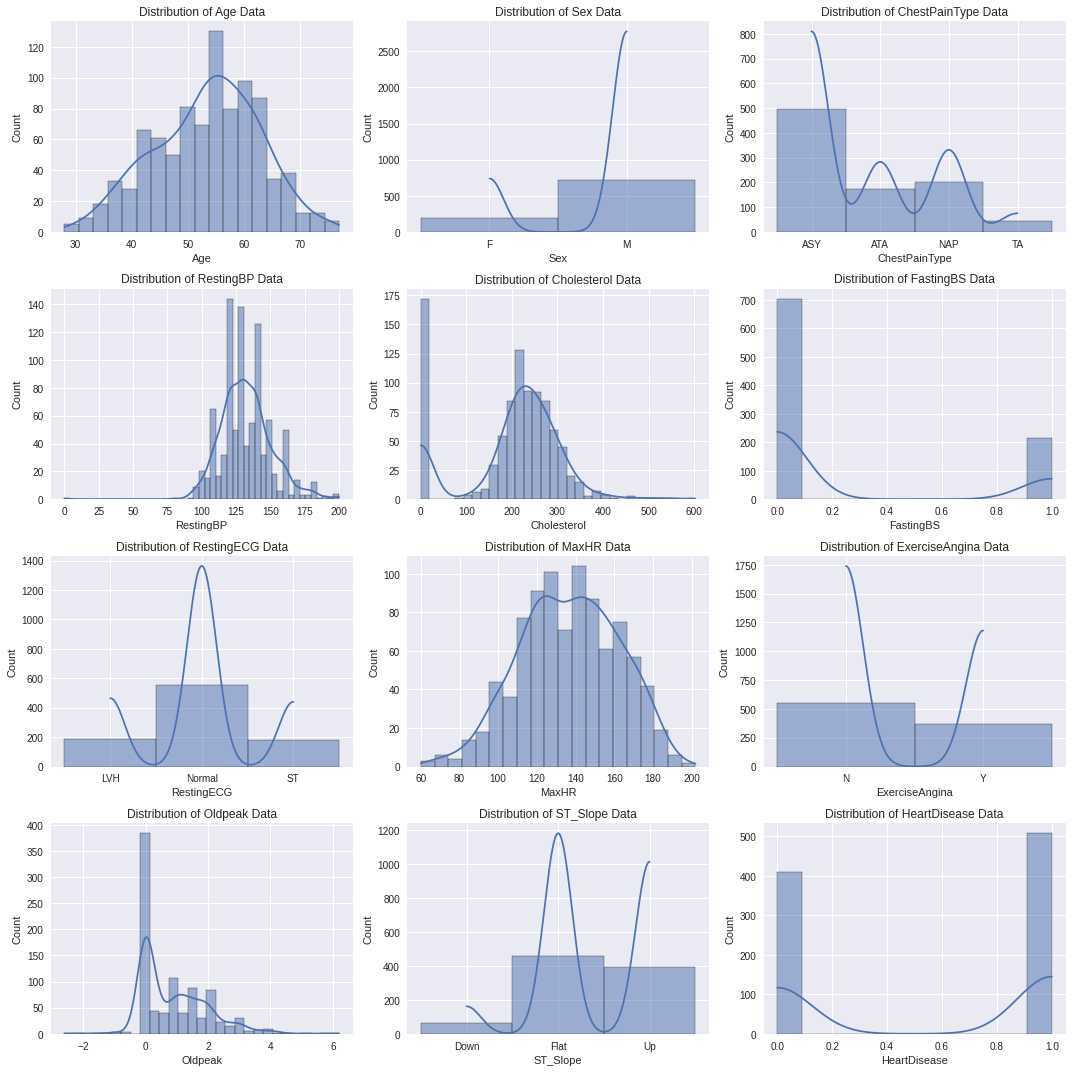

In [ ]:
plt.figure(figsize=(15,15))

for i,col in enumerate(df.columns, 1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

<Figure size 1440x720 with 0 Axes>

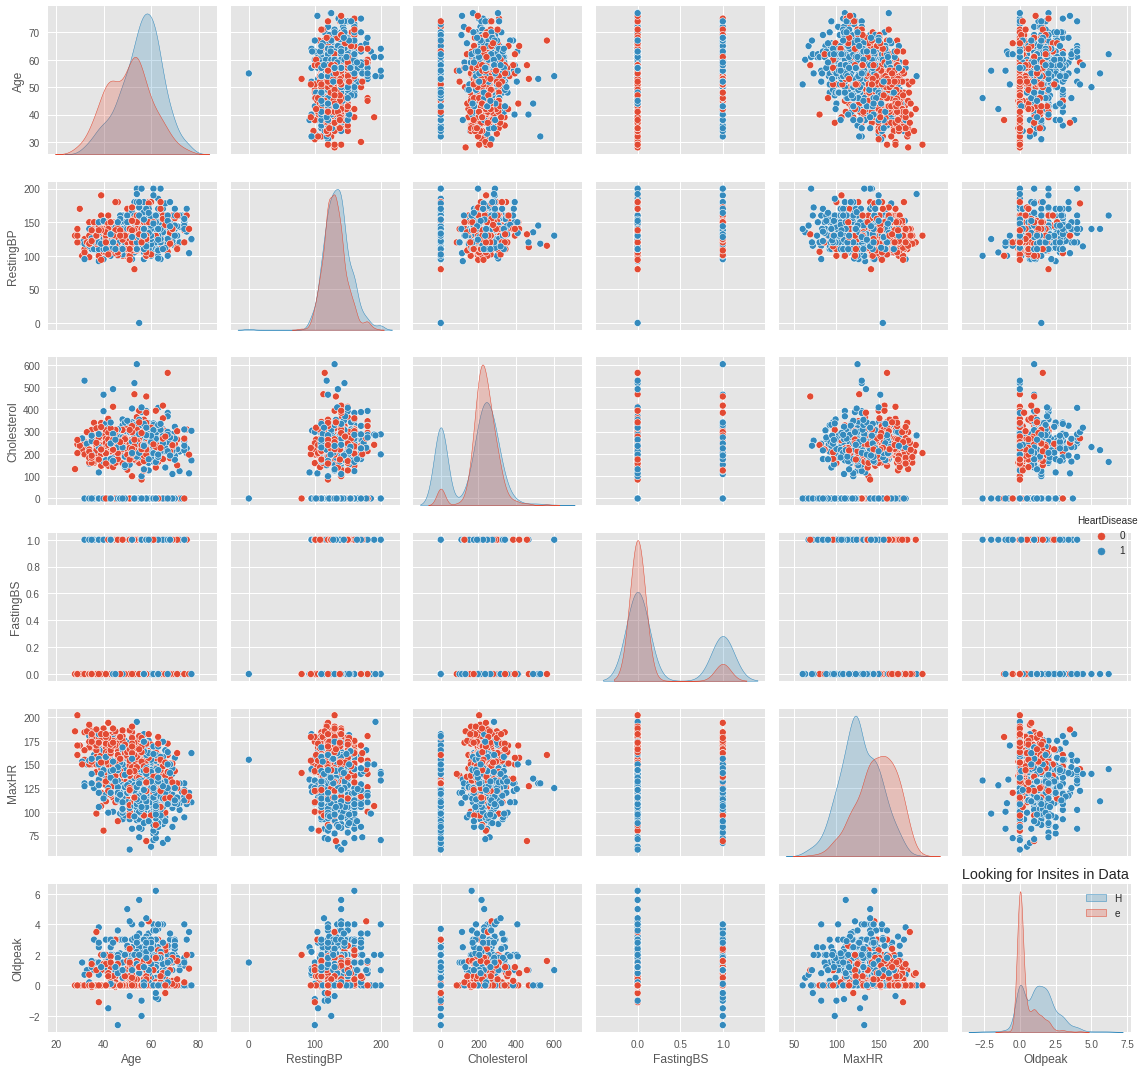

In [ ]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.pairplot(df, hue='HeartDisease')
plt.title('Looking for Insites in Data')
plt.legend('HeartDisease')
plt.tight_layout()
plt.show()

### Сформируем возрастные группы

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bins_names = ['0-10', '10-20',  '20-30', '40-50' '50-60', '60-70', '70-80', '80-90', '90-100', '100 +']
df['age_groups'] = pd.cut(df['Age'], bins=bins)

cat_cols.append('age_groups')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_groups
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,"(30, 40]"
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,"(40, 50]"
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,"(30, 40]"
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,"(40, 50]"
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,"(50, 60]"


In [ ]:
df_age_groups = df.groupby('age_groups').agg(
                             numbers_of_heart_disease      = ('HeartDisease', 'sum'),
                             Total_observation = ('HeartDisease', 'count')
                            ).reset_index().sort_values(by='numbers_of_heart_disease', ascending=False)

df_age_groups['%'] = round(df_age_groups['numbers_of_heart_disease'] / df_age_groups['Total_observation'] * 100, 2)
df_age_groups.sort_values(by='%', ascending=False)

,age_groups,numbers_of_heart_disease,Total_observation,%
6,"(60, 70]",145,197,73.60
7,"(70, 80]",16,24,66.67
5,"(50, 60]",222,381,58.27
4,"(40, 50]",93,223,41.70
3,"(30, 40]",32,88,36.36
2,"(20, 30]",0,5,0.00
0,"(0, 10]",0,0,NaN
1,"(10, 20]",0,0,NaN
8,"(80, 90]",0,0,NaN
9,"(90, 100]",0,0,NaN


In [ ]:
# В процентном соотношение кол-во больных и здоровых в каждой группе

stats_age_groups = pd.crosstab(df['age_groups'], df.HeartDisease, normalize='index')* 100
stats_age_groups

HeartDisease,0,1
age_groups,,
"(20, 30]",100.000000,0.000000
"(30, 40]",63.636364,36.363636
"(40, 50]",58.295964,41.704036
"(50, 60]",41.732283,58.267717
"(60, 70]",26.395939,73.604061
"(70, 80]",33.333333,66.666667


* Из распределения по возрастным группам видим, что самая опасная группа 60-70.
* Группа 70-80 нерепрезентативна, т.к. в нее попало всего лишь 24 наблюдения.
* При переходе от возрастной группы (50-60] к (60-70] доля больных сердечным заболеванием возрастает с 58.27% до 73.60% на 15.32%

In [ ]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

У людей имеющих проблемы с сердцем медианный возраст выше, чем у здоровых людей.

In [ ]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age", color='Sex')
fig.show()

Видим, что среди категории, имеющих проблемы с сердецем, медианный возраст женщин немного превышает возраст мужчин. Это косвенно свидетельствует о том, что у мужчины раньше повляются проблемы с сердцем.

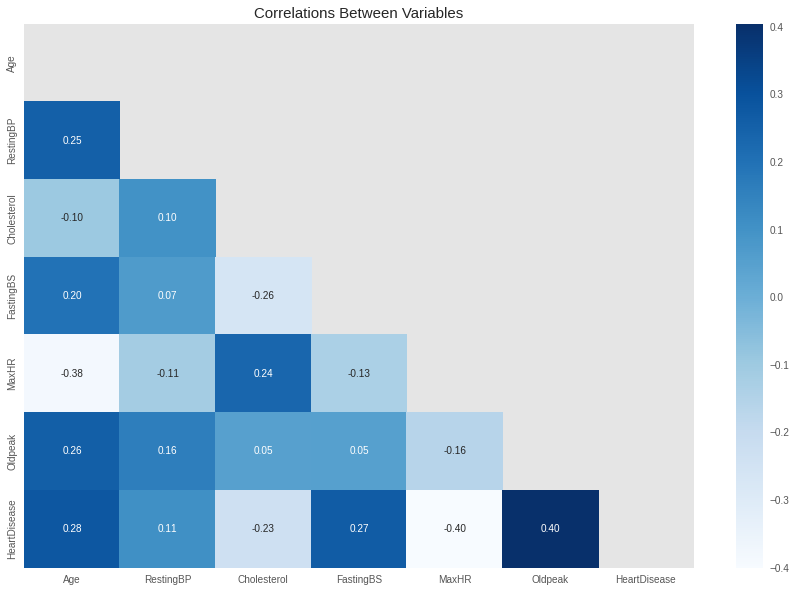

In [ ]:
corr = df.corr()
plt.figure(figsize= (15,10))
mask=np.triu(corr)
sns.heatmap(df.corr(), annot= True, fmt= ".2f", cmap="Blues", mask=mask)
plt.title("Correlations Between Variables",size = 15)
plt.show()

Наиболее значимая линейная корреляция наблюдается с:

**Отрицательная**

* максимальной частотой сердечных сокращений [числовое значение от 60 до 202]
* уровнем холестерина в крови - эта зависимость очень странная и требует дополнительного анализа

**Положительная**
* уровнем дипрессии
* уровнем сахара в крови
* артериальное давление в состоянии покоя

**Важно!** При корреляционном анализе мы увидели аномальную обратную корреляцию между целевой меткой и уровнем холестерина в крови. Рассмотрим более детально распределение уровня холестерина в крови и выясним, в чем причина аномалии в данных

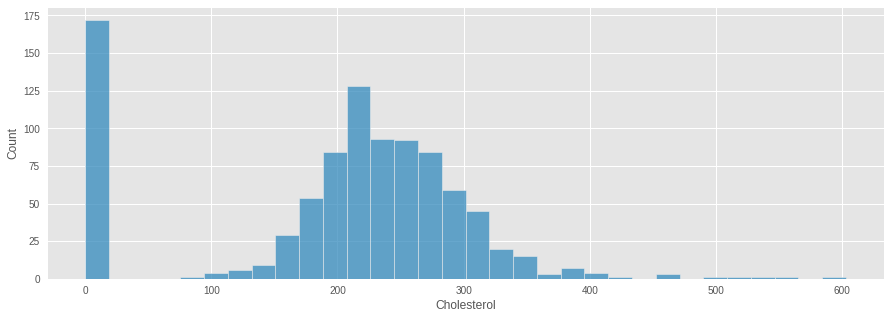

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(df['Cholesterol'])

Как видно из графика, наиболее часто встречается значение 0, что логично предположить, соответствует отсутствуюти заполненного
значения. Оценим объем пропущенных значений:

In [ ]:
miss_values = df[df.Cholesterol == 0].shape[0]
total_rows = df.shape[0]
print('Пропущено: {} записи, что составляет {:.2f}% от общего объема дата сета.'.format(miss_values, 100 * miss_values / total_rows))

Пропущено: 172 записи, что составляет 18.74% от общего объема дата сета.


###  Работа с пропусками в данных

Заменим пропущенные значения медианой в разрезе возрастной группы и соответствующей группы артериального давления пациента.

In [ ]:
# Заменим 0 пропусками:
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

df['Cholesterol'] = df['Cholesterol'].fillna(df.groupby(['age_groups', 'RestingECG' ])\
                                             ['Cholesterol'].transform('median'))

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
age_groups        0
dtype: int64

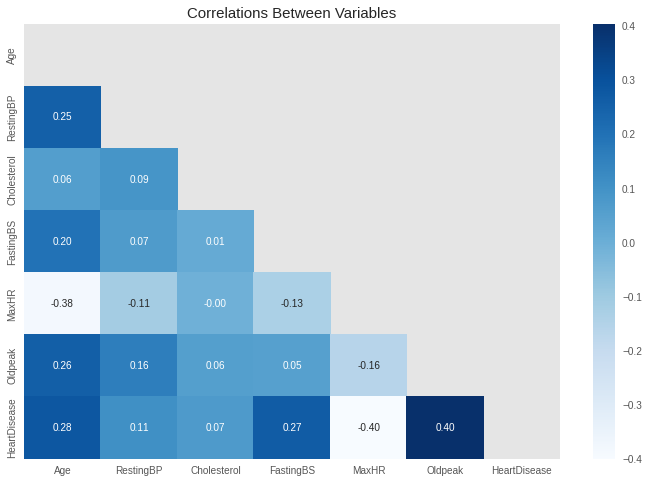

In [ ]:
corr = df.corr()
plt.figure(figsize= (12,8))
mask=np.triu(corr)
sns.heatmap(df.corr(), annot= True, fmt= ".2f", cmap="Blues", mask=mask)
plt.title("Correlations Between Variables",size = 15)
plt.show()

# Подготовка датасета к обучению моделей

In [ ]:

def unique_value_in_field(field):

    """
    Функция на вход принимает список полей датафрейма и выводит по ним список уникальных значений field: [value_1, value_2, ..., value_n]

    """
    print(col, ':', df[col].unique())

In [ ]:
# Для работы с категориальными признаками, посмотрим какие уникальные значения они принимают:

for i, col in enumerate(cat_cols):
    print(f'{i+1})', end=' ')
    unique_value_in_field(col)
    print('--'*45)

# Альтернативный вариант
# for col in string_col:
#     print(f"Распределение в категориальной переменной {col} : ")
#     print(df[col].value_counts())

1) Sex : ['M', 'F']
Categories (2, object): ['F', 'M']
------------------------------------------------------------------------------------------
2) ChestPainType : ['ATA', 'NAP', 'ASY', 'TA']
Categories (4, object): ['ASY', 'ATA', 'NAP', 'TA']
------------------------------------------------------------------------------------------
3) RestingECG : ['Normal', 'ST', 'LVH']
Categories (3, object): ['LVH', 'Normal', 'ST']
------------------------------------------------------------------------------------------
4) ExerciseAngina : ['N', 'Y']
Categories (2, object): ['N', 'Y']
------------------------------------------------------------------------------------------
5) ST_Slope : ['Up', 'Flat', 'Down']
Categories (3, object): ['Down', 'Flat', 'Up']
------------------------------------------------------------------------------------------
6) age_groups : [(30, 40], (40, 50], (50, 60], (60, 70], (20, 30], (70, 80]]
Categories (10, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (3

# One-hot и LabelEcoding

**Стратегия работы с категориальными признаками**:

 - Для признаков, у которых всего 2 значения, применим LabelEncoding
    
 - Для признаков, у которых более 2 значений, применим One-hot encoding


In [ ]:
le = LabelEncoder()

for col in cat_cols:
    if df[col].nunique() > 2:
        df = pd.get_dummies(data =df, columns=[col], drop_first=True)
    else:
        df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,...,ST_Slope_Up,"age_groups_(10, 20]","age_groups_(20, 30]","age_groups_(30, 40]","age_groups_(40, 50]","age_groups_(50, 60]","age_groups_(60, 70]","age_groups_(70, 80]","age_groups_(80, 90]","age_groups_(90, 100]"
0,40,1,140,289.0,0,172,0,0.0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,49,0,160,180.0,0,156,0,1.0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,37,1,130,283.0,0,98,0,0.0,1,0,...,1,0,0,1,0,0,0,0,0,0
3,48,0,138,214.0,0,108,1,1.5,0,0,...,0,0,0,0,1,0,0,0,0,0
4,54,1,150,195.0,0,122,0,0.0,0,1,...,1,0,0,0,0,1,0,0,0,0


# Разбиение выборки на train и  test set

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


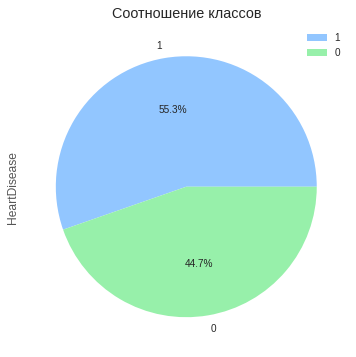

In [ ]:
### Оценим баланс классов:
plt.figure(figsize=(6, 6))
plt.style.use('seaborn-pastel')
df['HeartDisease'].value_counts(normalize=True).plot.pie(autopct='%.1f%%')
plt.title('Соотношение классов')
plt.legend();

**Вывод:** классы можно считать сбалансированными, нет необходмости использовать стратифицированную выборку при разбиение данных на трейн и тест сет.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Обучение - стекинг трех моделей: DecisionTree, RandomForest, SupportVectorMachine

In [ ]:
# Деревья не чувствительны (робастны) к масштабированию признаков
td = DecisionTreeClassifier()
rf = RandomForestClassifier()
bg = BaggingClassifier()

models = [td, rf, bg]


In [ ]:
def models_report(model, y_real, y_pred):

    '''функция по y_real и y_pred строит:
        - confusion matrix
        - отчет по метрикам качества классификации: accuracy, precion, f1_score
    '''

    print(f'Модель : {model}')
    conf_matrix = confusion_matrix(y_real, y_pred)
    plt.figure(figsize=(3, 2))
    print('Confusion Matrix:')
    sns.heatmap(conf_matrix, annot=True, fmt= ".1f")
    plt.xlabel('prediction')
    plt.ylabel('real class')
    plt.show()
    print(f'{classification_report(y_real, y_pred)}')
    print('-'*55)


### Обучение модели и предсказание на трейне и тесте:


Модель : DecisionTreeClassifier()
Confusion Matrix:


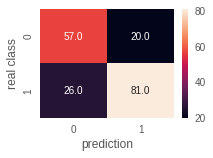

              precision    recall  f1-score   support

           0       0.69      0.74      0.71        77
           1       0.80      0.76      0.78       107

    accuracy                           0.75       184
   macro avg       0.74      0.75      0.75       184
weighted avg       0.75      0.75      0.75       184

-------------------------------------------------------
Модель : RandomForestClassifier()
Confusion Matrix:


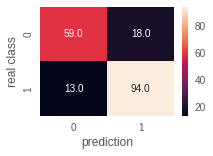

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        77
           1       0.84      0.88      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184

-------------------------------------------------------
Модель : BaggingClassifier()
Confusion Matrix:


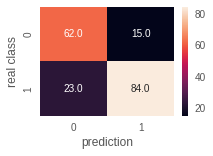

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        77
           1       0.85      0.79      0.82       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184

-------------------------------------------------------


In [ ]:
for model in models:
#     обучение
    model.fit(X_train, y_train)
#     предсказание
    y_test_pred = model.predict(X_test)
#     построение отчета

    models_report(model, y_test, y_test_pred)


# Важность признаков у алгоритма Random Forest

In [ ]:
imp = pd.Series(rf.feature_importances_)

In [ ]:
imp.index = pd.Series(X_train.columns)

<BarContainer object of 24 artists>

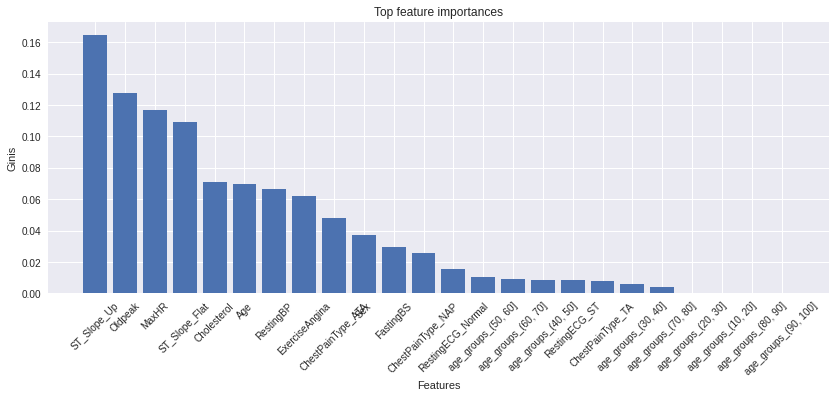

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(14,5))
plt.title('Top feature importances')
plt.xlabel('Features')
plt.ylabel('Ginis')
plt.xticks(rotation=45)


plt.bar(imp.sort_values(ascending=False).index, imp.sort_values(ascending=False), )

In [ ]:
rf.feature_importances_

array([6.95868737e-02, 3.74303138e-02, 6.65772291e-02, 7.10083526e-02,
       2.97201897e-02, 1.17059541e-01, 6.18550792e-02, 1.27861723e-01,
       4.79508721e-02, 2.56113780e-02, 8.11368935e-03, 1.55525463e-02,
       8.62349877e-03, 1.09366361e-01, 1.64906469e-01, 0.00000000e+00,
       1.17072925e-04, 5.82986712e-03, 8.76673378e-03, 1.02998043e-02,
       9.46829158e-03, 4.29411289e-03, 0.00000000e+00, 0.00000000e+00])

In [ ]:
pd.DataFrame({'feature_name': pd.Series(X_train.columns),
              'feature_importances': rf.feature_importances_
             }).sort_values(by='feature_importances', ascending=False)

,feature_name,feature_importances
14,ST_Slope_Up,0.164906
7,Oldpeak,0.127862
5,MaxHR,0.117060
13,ST_Slope_Flat,0.109366
3,Cholesterol,0.071008
0,Age,0.069587
2,RestingBP,0.066577
6,ExerciseAngina,0.061855
8,ChestPainType_ATA,0.047951
1,Sex,0.037430


**Выводы**:

- Получаем парадоксальный вывод, что на заболевания сердца влияет сильнее прирост частоты сердечных сокращений при физической нагрузки, а также уровень состояния дипрессии, чем возраст.

- Для конкретной задачи намного важней полнота первого класса Recall, чем Precion. Наша основная цель найти истинно положительный класс, больных пациентов. Лучше совершить ошибку первого рода False Positive и назначить обследование здоровому человеку, чем пропустить больного, не принять своевременные меры и допустить риск для его жизни - ошибка второго рода False Negative.  

- Самая высокая метрика качества Recall у Random Forest, далее идет bagging и хуже всего качество у Decision Tree. В данном примере ансамблевые алгоритмы дают лучшее качество, чем одиночное дерево.



# Стекинг моделей

Проведем стекинг трех моделей: DecisionTree, RandomForest и SVM.

In [ ]:
# Для svm включим в pipeline еще стандартизацию признаков, т.к. этот алгоритм очень чувствителен к разному масштабу.
svc = make_pipeline(StandardScaler(), LinearSVC())

In [ ]:
stack_model = StackingClassifier(estimators=[
                                             ('DecisionTreeClassifier', td),
                                             ('RandomForestClassifier', rf),
                                             ('Support Vector Machine', svc)

                                            ], final_estimator=LogisticRegression())

In [ ]:
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('Support Vector Machine',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc', LinearSVC())]))],
                   final_estimator=LogisticRegression())

In [ ]:
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

### Метрики качества на трейне

Модель : BaggingClassifier()
Confusion Matrix:


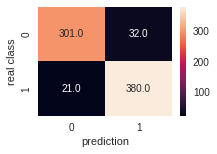

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       333
           1       0.92      0.95      0.93       401

    accuracy                           0.93       734
   macro avg       0.93      0.93      0.93       734
weighted avg       0.93      0.93      0.93       734

-------------------------------------------------------


In [ ]:
models_report(model, y_train, y_train_pred)


### Метрики качества на тесте

Модель : BaggingClassifier()
Confusion Matrix:


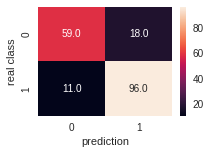

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        77
           1       0.84      0.90      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184

-------------------------------------------------------


In [ ]:
models_report(model, y_test, y_test_pred)


**Вывод**:

- Стекинг по трем моделям (DecisionTree, RandomForest, Support Vector Machine) дает высокий результат на отложенной тестовой выборке и опережает любой выше рассмотренный алгоритм по отдельности (Random Forest, Baggin, Descion Tree).


- При этом модель имеет склонность к переобучению на трейне. В качестве шагов улучшения можно попробовать подобрать регуляризацию для финального эстимейтора - final_estimator=LogisticRegression()